1. perform facet grid of histograms and/or scatterplots, or...

# Data Analysis on bank loans from Prosper
### by Aaron Remski

> The dataset used for this analysis has ~114,000 records containing data on bank loans from 2005-2014. It includes 81 features ranging from the borrower's credit grade to their stated monthly income.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows', 150) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format # set it to convert scientific notation such 
# as 4.22510e+11 to 42251000462321.00

In [2]:
############################################################################
## (Un)Comment out if using a lighter background style in Jupyter
plt.style.use("dark_background")

In [3]:
# load data into pandas dataframe!
loanDF = pd.read_csv("prosperLoanData.csv")

## Dataset Overview


In [4]:
# width & height
loanDF.shape

(113937, 81)

In [5]:
# review loanDF variables & identify features that require additional tidying/cleaning
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# see sample of data
loanDF.sample(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
43259,D2053470035389928125D24,438188,2009-12-14 19:40:19.387000000,NaN,36,Chargedoff,2011-09-29 00:00:00,0.3570,0.3300,0.3200,0.2119,0.1000,0.2119,3.0000,D,7.0000,1,FL,Food Service,Full-time,40.0000,True,False,NaN,2009-11-28 07:33:21,720.0000,739.0000,1986-11-01 00:00:00,18.0000,15.0000,36.0000,12,551.0000,1.0000,5.0000,2.0000,6266.0000,9.0000,0.0000,0.0000,19796.0000,0.6300,8980.0000,33.0000,0.9000,2.0000,0.4600,"$25,000-49,999",True,2083.3333,2D8A35749679672334D0583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015,21.0000,51,40179,1500,2009-12-30 00:00:00,Q4 2009,88B53463060149968F6E672,66.1700,1058.7200,493.6000,565.1200,-17.1400,0.0000,1006.4100,1006.4000,0.0000,1.0000,0,0,0.0000,33
92135,5F743603568243828B4C418,1202267,2014-02-20 18:18:30.663000000,NaN,36,Current,NaN,0.1212,0.0930,0.0830,0.0806,0.0249,0.0557,6.0000,A,7.0000,1,KS,Nurse (LPN),Employed,78.0000,False,False,NaN,2014-02-20 18:18:33,700.0000,719.0000,1981-04-01 00:00:00,9.0000,8.0000,15.0000,6,308.0000,0.0000,3.0000,0.0000,0.0000,0.0000,1.0000,0.0000,8466.0000,0.4700,9434.0000,15.0000,1.0000,2.0000,0.3100,"$50,000-74,999",True,5000.0000,801737075289064260E701C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134405,15000,2014-03-03 00:00:00,Q1 2014,B9C43706624959578BBCAE1,479.0900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,170
94378,9817339311152697034695C,161720,2007-07-02 09:48:08.697000000,A,36,Defaulted,2008-07-10 00:00:00,0.1471,0.1400,0.1350,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Professional,Full-time,79.0000,True,False,NaN,2007-07-01 08:58:48.577000000,740.0000,759.0000,1992-09-29 00:00:00,8.0000,7.0000,39.0000,2,0.0000,10.0000,21.0000,2.0000,2464.0000,5.0000,1.0000,0.0000,0.0000,0.0000,1800.0000,16.0000,0.7000,1.0000,0.3200,"$50,000-74,999",True,5000.0000,FDA0339437862005523116A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1821,12.0000,80,16863,7000,2007-07-11 00:00:00,Q3 2007,14693392290269220BB1814,239.2400,1644.6800,1070.4300,574.2500,-5.8800,-124.5300,5931.2800,5929.5700,0.0000,1.0000,0,0,0.0000,73
101024,27F635730041113624C4A13,731319,2013-03-16 09:01:20.103000000,NaN,36,Current,NaN,0.2271,0.1899,0.1799,0.1679,0.0724,0.0955,4.0000,C,5.0000,1,ID,Other,Employed,111.0000,False,False,NaN,2013-05-03 21:50:19,680.0000,699.0000,1990-12-14 00:00:00,6.0000,5.0000,17.0000,5,261.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10679.0000,0.7300,3921.0000,17.0000,1.0000,0.0000,0.2100,"$25,000-4

## Structure of Dataset summarized
* ~114,000 records with 81 characteritics on completed, defaulted, current, & other types of bank loans. <br>
### Noteable Features
IncomeRange, CreditGrade, Term, LoanStatus, CloseDate, BorowerAPR, BorrowerRate,  LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, ExmploymentStatus, ExmploymentStatusDuration, ListingNumber, ListingCreationDate, 

## Assessing Dataset

* Roughly 20 features will be removed to clean dataset <br>
* 4 (features)variables express dates, e.g. ListingCreationDate, ClosedDate, DateCreditPulled, LoanOriginationDate. Convert to datetime type<br>
* Several (variables)columns types need to be converted, e.g. CreditGrade, ProsperRating (Alpha), IncomeRange to the ordered categorical type<br>


In [7]:
##################### DELETE THIS CELL? ########################################################
# Columns to keep
keep = ['ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','CloseDate','BorrowerAPR','BorrowerRate',
    'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
    'ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','ExmploymentStatus','ExmploymentStatusDuration']

In [8]:
# Columns to remove
remove = ['ListingKey', 'TotalTrades','TradesNeverDelinquent (percentage)', 'LoanKey','TotalProsperLoans','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPrincipalBorrowed',
          'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination',
          'LoanNumber','MemberKey']

## Data Cleaning
### Remove features that have too much data missing & provide no meaningful purpose in the present analysis.

In [9]:
# remove columns defined in 'remove' list to work with a roughly smaller dataframe
# show/verify remaining columns after removal

loanDF = loanDF.drop(remove, axis=1)
loanDF.columns

Index(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCre

### Convert alpha columns into ordered categories

In [10]:
# This is where the ordinal_categories will be defined & converted
# convert CreditGrade, ProsperRating (Alpha), & IncomeRange to ordinal categorical types
# CreditGrade, & ProsperRating (Alpha): order assumed

ordinal_dict = {'CreditGrade': ['AA','A','B','C','D','E','HR'],
                    'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR'],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999',
                                   '$1-24,999','0','Not employed','Not displayed']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_dict[var])
    loanDF[var] = loanDF[var].astype(ordered_var)    

In [11]:
# confirm ordered categorical datatype converted
loanDF.CreditGrade.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

In [12]:
# confirm IncomeRange dtype converted
loanDF.IncomeRange.dtype

CategoricalDtype(categories=['$100,000+', '$75,000-99,999', '$50,000-74,999',
                  '$25,000-49,999', '$1-24,999', '0', 'Not employed',
                  'Not displayed'],
, ordered=True)

### Datatime type updates

In [13]:
# Convert type of date fields to datetime64[ns]

datecols = ['ListingCreationDate','ClosedDate','DateCreditPulled','LoanOriginationDate']

for datecol in datecols:
    loanDF[datecol] = pd.to_datetime(loanDF[datecol])

In [14]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

In [15]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

*If LoanOriginationQuarter is used for analysis it will need cleaning. For example "Q3 2015" should be "Q3", 3 or similar. The year should be removed as it's labelled in the LoanOriginationDATE, therefore, redundant.*

### What time range on loans are we dealing with?

In [16]:
# get timeframe of loans
print("LoanOriginationDate: \n")
print(f"Earliest Loan Origination Date: {loanDF.LoanOriginationDate.min()}")
print(f"Latest Loan Origination Date: {loanDF.LoanOriginationDate.max()}\n\n")

print("ListingCreationDate: \n")
print(f"Earliest Listing Creation Date: {loanDF.ListingCreationDate.min()}")
print(f"Latest Listing Creation Date: {loanDF.ListingCreationDate.max()}\n\n")

print("ClosedDate: \n")
print(f"Earliest Closed Date: {loanDF.ClosedDate.min()}")
print(f"Latest Closed Date: {loanDF.ClosedDate.max()}\n\n")

print("DateCreditPulled: \n")
print(f"Earliest Date Credit Pulled: {loanDF.DateCreditPulled.min()}")
print(f"Latest Date Credit Pulled: {loanDF.DateCreditPulled.max()}\n\n")



LoanOriginationDate: 

Earliest Loan Origination Date: 2005-11-15 00:00:00
Latest Loan Origination Date: 2014-03-12 00:00:00


ListingCreationDate: 

Earliest Listing Creation Date: 2005-11-09 20:44:28.847000
Latest Listing Creation Date: 2014-03-10 12:20:53.760000


ClosedDate: 

Earliest Closed Date: 2005-11-25 00:00:00
Latest Closed Date: 2014-03-10 00:00:00


DateCreditPulled: 

Earliest Date Credit Pulled: 2005-11-09 00:30:04.487000
Latest Date Credit Pulled: 2014-03-10 12:20:56




### 2018 SOC (Standard Occupational Classification)
Add additional categorization of loanee occupations using (ISCO-08), 

In [17]:
socDF = pd.read_csv("ISCO-08.csv")
socDF.head(5)

,Prosper Occupation,Number of Loans,ILOSTAT Major Group,Minor Group
0,Accountant/CPA,3233,Business & Financial Operations Occupations,Finance
1,Administrative Assistant,3688,Business & Financial Operations Occupations,Administrative
2,Analyst,3602,Business & Financial Operations Occupations,Scientist
3,Architect,213,Architecture & Engineering Occupations,Architect
4,Attorney,1046,Legal Occupations,Lawyers


In [18]:
# The major group will be added to LoanDF to reduce & generalize occupations
socDF['ILOSTAT Major Group'].value_counts()

Community and Social Service Occupations              17
Business & Financial Operations Occupations            8
Construction & Extraction Occupations                  7
Healthcare Practitioners and Technical Occupations     7
Government - Local, State, Federal                     5
Architecture & Engineering Occupations                 4
Transportation & Material Moving Occupations           4
Sales and Related Occupations                          4
Life, Physical, & Social Science Occupations           3
Food Preparation & Serving Related Occupations         3
Legal Occupations                                      1
Computer & Mathematical Occupations                    1
Family                                                 1
Building & Grounds Maintenance                         1
Other                                                  1
Name: ILOSTAT Major Group, dtype: int64

In [19]:
socDF.drop('Number of Loans', axis=1, inplace=True)
socDF.head(1)

,Prosper Occupation,ILOSTAT Major Group,Minor Group
0,Accountant/CPA,Business & Financial Operations Occupations,Finance


In [20]:
socDF = socDF.rename(columns={'Prosper Occupation':'Occupation'})
socDF.head(2)

,Occupation,ILOSTAT Major Group,Minor Group
0,Accountant/CPA,Business & Financial Operations Occupations,Finance
1,Administrative Assistant,Business & Financial Operations Occupations,Administrative


In [21]:
# Add socDF Major & Minor groups to loanDF where relevant

loanDF = pd.merge(loanDF, socDF, on='Occupation')


In [22]:
loanDF.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group,Minor Group
33228,545443,2011-12-19 07:09:15.820,NaN,36,Chargedoff,2013-10-22,0.3458,0.3058,0.2958,0.2822,0.1470,0.1352,2.0000,E,5.0000,6,PA,Professional,Employed,42.0000,False,False,NaN,2011-12-17 13:53:20.000,700.0000,719.0000,1989-12-08 00:00:00,7.0000,6.0000,17.0000,4,242.0000,3.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9879.0000,0.3900,15121.0000,3.0000,0.2600,"$25,000-49,999",True,3000.0000,NaN,3500,2011-12-22,Q4 2011,149.6900,2529.7300,1221.1800,1308.5500,-36.9100,0.0000,2278.8200,2278.8200,0.0000,1.0000,0,0,0.0000,16,Business & Financial Operations Occupations,Skilled Labor
42747,508388,2011-05-24 06:29:35.873,NaN,36,Chargedoff,2013-12-26,0.3462,0.3099,0.2999,0.2861,0.1300,0.1561,2.0000,E,3.0000,2,AL,Skilled Labor,Full-time,69.0000,True,False,NaN,2011-05-24 06:29:32.000,660.0000,679.0000,1995-02-25 00:00:00,6.0000,6.0000,31.0000,2,16.0000,1.0000,3.0000,0.0000,0.0000,7.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.2700,"$25,000-49,999",True,4083.3333,35.0000,7000,2011-05-26,Q2 2011,300.9700,7825.2200,4361.6600,3463.5600,-111.7600,0.0000,2638.3400,2638.3400,0.0000,1.0000,0,0,0.0000,52,Construction & Extraction Occupations,Skilled Labor
81995,372158,2008-07-23 13:15:14.460,E,36,Completed,2011-07-31,0.1699,0.1482,0.1382,NaN,NaN,NaN,NaN,NaN,NaN,2,CA,Attorney,Full-time,5.0000,False,True,FB7E337608795605823EDCF,2008-07-23 09:31:40.900,560.0000,579.0000,2000-08-08 00:00:00,11.0000,9.0000,23.0000,1,24.0000,0.0000,4.0000,0.0000,0.0000,8.0000,0.0000,0.0000,826.0000,1.6500,0.0000,0.0000,0.4100,"$75,000-99,999",True,6800.0000,25.0000,2500,2008-07-31,Q3 2008,86.4400,3112.1800,2500.0000,612.1800,-41.3200,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,62,Legal Occupations,Lawyers


In [23]:
# pull year out This would normally be delt with let's see if we want to use it.
# 'LoanOriginationQuarter'

# This analysis will explore:
1. What are some common characteristics of 'successful' (completed) vs 'failed' (defaulted & chargedoff) loans?
2. Are there any surprising characteristics of 'successful' vs. 'failed' loans?
3. Do some of the expected/obvious value relationships check out for 'Successful' & 'Failed' loans? 
    a. higher credit scores correlate for successful & vice versa
    b. lower debt to income ratio for successful & vice versa
    c. higher IncomeRange for successful & vice versa

4. Add occupation & ISOC-08 categorization as a third feature to add to a multivariant plot

## Other interesting explorations

## Features in the dataset that will help support the investigation
1. LoanStatus
2. LoanOriginalAmount
3. DebtToIncomeRatio
4. StatedMonthlyIncome
5. ProsperRating (alpha)
6. CreditGrade
7. PastDue (lengths)
8. CreditScoreRangeLower & RangeUpper
9. MonthlyLoanPayment


### END of Preliminary Data Wrangling
### START of Exploration

In [24]:
# reveal number of records according to their LoanStatus
loanDF.LoanStatus.value_counts()

Current                   54968
Completed                 36517
Chargedoff                11641
Defaulted                  4482
Past Due (1-15 days)        796
Past Due (31-60 days)       355
Past Due (61-90 days)       311
Past Due (91-120 days)      302
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

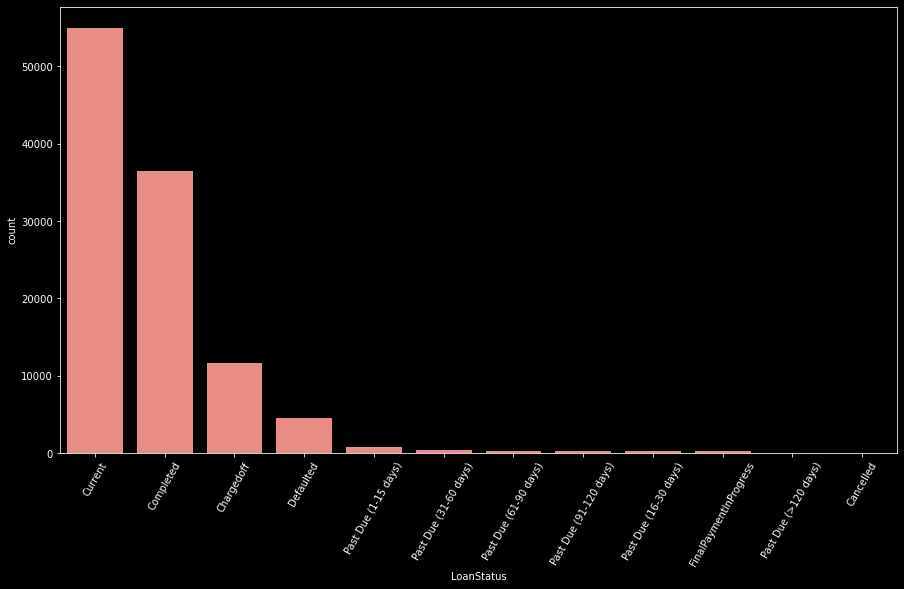

In [25]:
# Visualize LoanStatus distribution

fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
ax.tick_params(axis='x', rotation=60)
sb.countplot(data=loanDF, x='LoanStatus', color=sb.color_palette()[3], order=loanDF.LoanStatus.value_counts().index);

## Countplot analysis - LoanStatus
> As expected the majority of the bank loans are either current(good standing) or completed. However there is a healthy number of ChargedOffs & Defaulted loans.<br/>
> I would like further analysis of failed loans (ChargedOff & Defaulted) & successful loans (Completed)


In [60]:
# create new DF for all Successful loans
successful = loanDF.query('LoanStatus == "Completed"')
current = loanDF.query('LoanStatus == "Current"')
successful.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group,Minor Group
83083,246051,2007-12-06 20:15:31.380,B,36,Completed,2008-12-16,0.1300,0.1230,0.1130,NaN,NaN,NaN,NaN,NaN,NaN,1,CA,Nurse (RN),Full-time,367.0000,False,False,NaN,2007-12-03 14:56:15.080,680.0000,699.0000,1979-03-15 00:00:00,14.0000,14.0000,20.0000,12,1173.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,32369.0000,0.8800,3733.0000,0.0000,0.2400,"$75,000-99,999",True,7856.3333,NaN,3000,2007-12-18,Q4 2007,100.0700,3243.1400,3000.0000,243.1400,-19.7800,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,103,Healthcare Practitioners and Technical Occupat...,Frontline Health
100910,541048,2011-11-25 15:04:09.177,NaN,36,Completed,2012-05-08,0.3509,0.3108,0.3008,0.2870,0.1470,0.1400,2.0000,E,4.0000,1,FL,Professor,Employed,28.0000,True,False,NaN,2011-11-25 15:04:06.000,700.0000,719.0000,1998-06-23 00:00:00,11.0000,10.0000,41.0000,7,675.0000,2.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18911.0000,0.7000,6284.0000,0.0000,0.3000,"$75,000-99,999",True,6250.0000,NaN,7500,2011-11-30,Q4 2011,322.8400,8482.7200,7500.0000,982.7200,-31.6200,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,22,Community and Social Service Occupations,Education
21310,71455,2006-12-06 20:16:04.900,B,36,Completed,2008-06-06,0.1245,0.1175,0.1125,NaN,NaN,NaN,NaN,NaN,NaN,0,MD,Other,Not available,NaN,True,True,CC8D33653247904019A9059,2006-11-28 09:40:41.073,680.0000,699.0000,1984-09-15 00:00:00,NaN,NaN,26.0000,8,1065.0000,2.0000,4.0000,0.0000,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,0.2000,Not displayed,True,10125.0000,NaN,12000,2006-12-20,Q4 2006,397.1400,13583.3200,12000.0000,1583.3200,-67.3900,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,332,Other,Other


In [58]:
# make dataframe for failed loans 
failed = loanDF.query('LoanStatus == "Defaulted" or LoanStatus == "Chargedoff"')
failed.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group,Minor Group
51332,80311,2007-01-02 10:47:40.143,E,36,Chargedoff,2010-02-11,0.2123,0.2000,0.1950,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Sales - Retail,Not available,NaN,False,False,NaN,2006-12-19 19:22:34.780,540.0000,559.0000,1998-03-19 00:00:00,NaN,NaN,37.0000,6,105.0000,3.0000,13.0000,10.0000,NaN,35.0000,9.0000,NaN,NaN,NaN,NaN,NaN,0.0400,Not displayed,True,4000.0000,NaN,1500,2007-01-10,Q1 2007,55.7500,1784.0000,1286.5300,497.4700,-12.4400,0.0000,213.4700,213.4700,0.0000,1.0000,0,0,0.0000,17,Sales and Related Occupations,Sales
31731,236814,2007-11-24 17:33:48.197,D,36,Chargedoff,2008-07-02,0.1998,0.1884,0.1784,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Professional,Full-time,20.0000,True,False,NaN,2007-11-24 17:19:53.720,620.0000,639.0000,1998-03-23 00:00:00,10.0000,9.0000,20.0000,4,41.0000,4.0000,7.0000,0.0000,0.0000,12.0000,0.0000,0.0000,78.0000,0.1000,672.0000,2.0000,0.1100,"$25,000-49,999",True,2833.3333,NaN,1600,2007-12-03,Q4 2007,58.5200,102.0400,31.7100,70.3300,-2.9400,-23.4100,1568.2900,1568.2900,0.0000,1.0000,0,0,0.0000,22,Business & Financial Operations Occupations,Skilled Labor
21104,206836,2007-09-25 17:32:31.440,C,36,Defaulted,2010-02-03,0.2475,0.2400,0.2300,NaN,NaN,NaN,NaN,NaN,NaN,0,AL,Other,Full-time,49.0000,False,False,NaN,2007-09-25 16:55:49.080,640.0000,659.0000,1995-11-10 00:00:00,2.0000,2.0000,4.0000,1,17.0000,10.0000,18.0000,0.0000,0.0000,0.0000,0.0000,0.0000,613.0000,0.5100,587.0000,0.0000,0.3000,"$25,000-49,999",True,3115.0000,NaN,15000,2007-10-02,Q4 2007,588.4900,13535.2700,8307.0400,5228.2300,-217.8400,0.0000,6692.9600,6692.9600,0.0000,1.0000,0,0,0.0000,135,Other,Other


In [59]:
failed.LoanOriginalAmount.sum()

105253026

#### $105,000,000 in failed loans. 

In [29]:
(105000000 / 950000000) * 100

11.052631578947368

#### 11.6% of the bank loans represented in this dataset are failed. 

In [30]:
# Compare completed loan numbers & mean borrowerrate
print(f"Total # of Successful(Completed) Loans: {Completed.ListingNumber.count()}\nSuccessful(Completed) Loans mean interest rate: {Completed.BorrowerRate.mean()}")
print(f"Total # of Failed Loans: {failed.ListingNumber.count()}\nFailed Loans mean interest rate: {failed.BorrowerRate.mean()}")


Total # of Completed Loans: 36517
Completed Loans mean interest rate: 0.18722458580934612
Total # of Failed Loans: 16123
Failed Loans mean interest rate: 0.23205632326489548


In [31]:
high_interest = loanDF['BorrowerRate'] > 0.25
print(high_interest.sum())
high_interest_rate = loanDF.loc[loanDF['BorrowerRate'] > 0.25]
#high_interest_rate.sum()
                            

27651


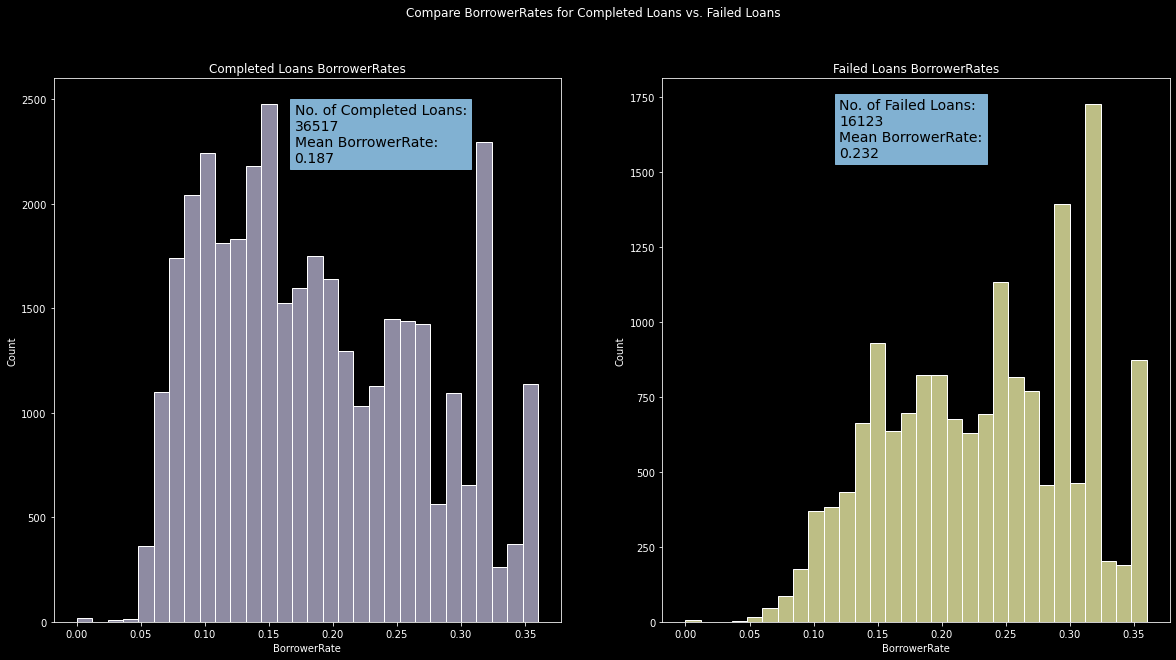

In [32]:
# Compare BorrowerRate's between the Completed loans & the Defaulted & ChargedOff
# would like to stack these but I don't want to single out the "completed" & "failed"
fig, ax = plt.subplots(1,2, figsize = (20,10))
fig.suptitle("Compare BorrowerRates for Completed Loans vs. Failed Loans")

style = dict(size=14, color='black', backgroundcolor=sb.color_palette()[4])

completed_no = "No. of Completed Loans:\n" + str(Completed.ListingNumber.count()) + "\n"
completed_mean = "Mean BorrowerRate:\n" + str(round(Completed.BorrowerRate.mean(),3))

ax[0].set_title("Completed Loans BorrowerRates")
ax[0].text(0.17,2200,completed_no + completed_mean, **style)
#ax[1].annotate(str(Completed.BorrowerRate.mean()),(0.05,3250))
sb.histplot(data=Completed, x='BorrowerRate', bins=30, color=sb.color_palette()[2], ax=ax[0]);

failed_no = "No. of Failed Loans:\n" + str(failed.ListingNumber.count()) + "\n"
failed_mean = "Mean BorrowerRate:\n" + str(round(failed.BorrowerRate.mean(),3))

ax[1].set_title("Failed Loans BorrowerRates")
ax[1].text(0.12,1550,failed_no + failed_mean, **style)
#plt.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='white')
boxf = sb.histplot(data=failed, x='BorrowerRate', bins=30, color=sb.color_palette()[1], ax=ax[1]);

## Bivariate - BorrowRate & LoanStatus
## Histogram Analysis - BorrowerRate
Comparing the BorrowerRate distribution (& mean) for Failed Loans vs. Completed Loans. 

* There are double the number of completed loans to the number of failed loans. This is a much higher ratio than expected.
* As one might guestimate, the completed loans interest rates are lower vs. the failed loans
* There was nothing surprising that came from this visualization


In [33]:
# get all records that match the query
past3160 = loanDF.query("LoanStatus == 'Past Due (31-60 days)'")
past6190 = loanDF.query("LoanStatus == 'Past Due (61-90 days)'")
past91120 = loanDF.loc[loanDF.LoanStatus == 'Past Due (91-120 days)']
past120 = loanDF.query("LoanStatus == 'Past Due (>120 days)'")

defaulted = loanDF.query("LoanStatus == 'Defaulted'")

all_past = pd.concat([past3160, past6190, past91120, past120])


In [34]:
all_past.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ILOSTAT Major Group,Minor Group
100739,570605,2012-03-21 08:40:35.123,NaN,36,Past Due (31-60 days),NaT,0.1736,0.1449,0.1349,0.1326,0.0565,0.0761,5.0000,B,8.0000,1,TN,Medical Technician,Employed,344.0000,True,False,NaN,2012-03-08 12:59:28,680.0000,699.0000,1989-09-01 00:00:00,7.0000,4.0000,43.0000,3,60.0000,0.0000,2.0000,5.0000,0.0000,2.0000,1.0000,0.0000,509.0000,0.3600,891.0000,4.0000,0.1100,"$50,000-74,999",True,4958.3333,NaN,12000,2012-04-02,Q2 2012,412.9900,9081.8600,6543.5000,2538.3600,-163.3900,-282.8700,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,198,Healthcare Practitioners and Technical Occupat...,Frontline Health
99920,604287,2012-06-26 11:12:15.160,NaN,36,Past Due (31-60 days),NaT,0.3397,0.2999,0.2899,0.2766,0.1490,0.1276,2.0000,E,2.0000,2,WA,Medical Technician,Employed,62.0000,False,False,NaN,2012-06-26 11:12:13,640.0000,659.0000,2000-03-05 00:00:00,8.0000,10.0000,19.0000,6,174.0000,1.0000,12.0000,2.0000,3109.0000,0.0000,1.0000,0.0000,2633.0000,0.5500,1553.0000,0.0000,0.3400,"$25,000-49,999",True,3333.3333,9.0000,4000,2012-06-29,Q2 2012,169.7800,3056.0400,1478.9800,1577.0600,-51.6000,-57.7200,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,52,Healthcare Practitioners and Technical Occupat...,Frontline Health
27309,546648,2011-12-25 13:14:45.653,NaN,36,Past Due (31-60 days),NaT,0.2897,0.2511,0.2411,0.2352,0.1120,0.1232,3.0000,D,6.0000,1,MD,Other,Employed,25.0000,False,False,NaN,2011-12-14 10:12:36,740.0000,759.0000,1985-07-01 00:00:00,3.0000,2.0000,24.0000,2,82.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,300.0000,0.0000,0.1900,"$1-24,999",True,1583.3333,NaN,2000,2011-12-29,Q4 2011,79.6400,1851.3600,964.7100,886.6500,-27.7000,-54.1600,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,3,Other,Other


In [35]:
all_past.LoanOriginalAmount.sum()

8006669

#### $8,000,000 in Past Due loans

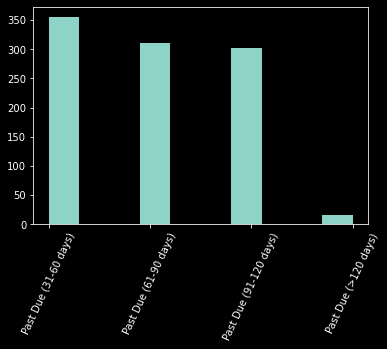

In [36]:
# plot distribution of LoanStatus where loanstatus == past due

plt.hist(data=all_past, x='LoanStatus')
plt.xticks(rotation=65);

## Histogram Analysis - Past Due

* There are roughly 1000 loans that are in a "past due" LoanStatus totalling $8,000,000 in loans
* There are no "CreditGrade" values for all entries with "past due" in LoanStatus


In [37]:
loanDF3 = loanDF.copy()

## LoanOriginalAmount

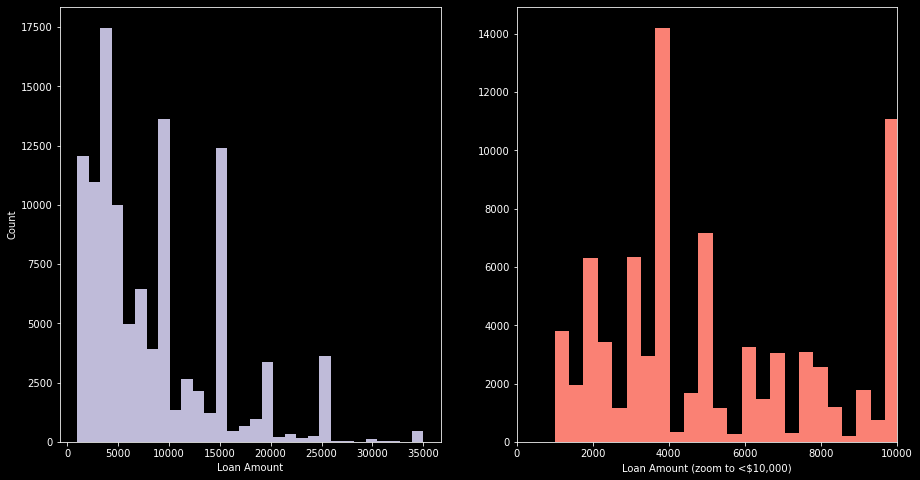

In [38]:
plt.figure(figsize=[15,8])
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
plt.subplot(1,2,1)
#plt.set_title("All loans")
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=30, color=sb.color_palette()[2]);

plt.subplot(1,2,2)
#plt.set_title("Loans <= $5000")
plt.xlabel('Loan Amount (zoom to <$10,000)')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=90, color=sb.color_palette()[3]);
plt.xlim(0,10000);


## Histogram analysis - LoanAmount
* `$`4000 loan is the most prevalent loan amount. Additionally, loan amounts fall in `$`5,000 increments with the highest loans no greater than `$`35,000<br>
* There is a right-skew.<br>
* Nearly half of all Prosper loans are < $5000. What distinguishes these loans from the others?
* Investigate the `$`4000 loans<br>


In [39]:
loanDF3.query("LoanOriginalAmount <= 5000")['LoanOriginalAmount'].describe()

count   49223.0000
mean     3280.4025
std      1190.2072
min      1000.0000
25%      2300.0000
50%      3500.0000
75%      4000.0000
max      5000.0000
Name: LoanOriginalAmount, dtype: float64

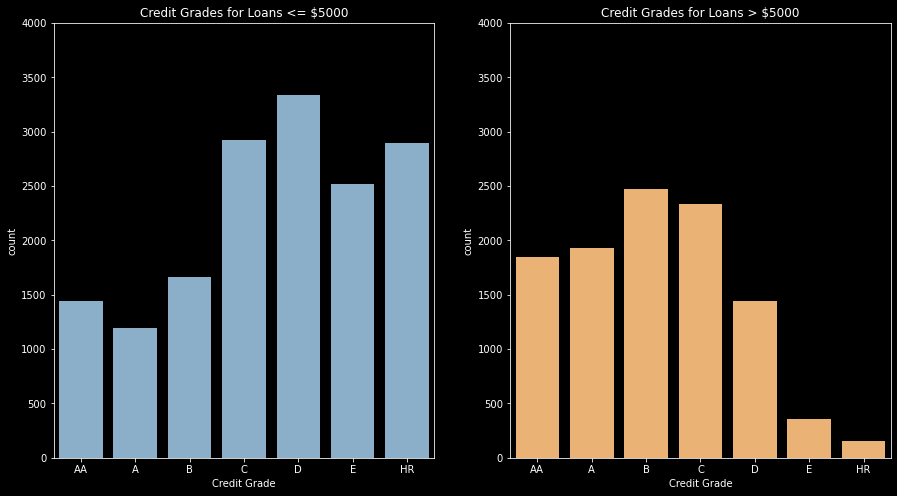

In [40]:
#sb.displot(data=loans5000, x='CreditGrade')
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)

#plt.xlabel('CreditGrade for Loans <= $5000')
graph2 = sb.countplot(data=(loanDF3.query("LoanOriginalAmount <= 5000")), x='CreditGrade', color=sb.color_palette()[4])
graph2.set(title="Credit Grades for Loans <= $5000")
plt.xlabel("Credit Grade")
plt.ylim(0,4000)

plt.subplot(1,2,2)
#plt.xtitle('CreditGrade for Loans <= $5000')
graph = sb.countplot(data=(loanDF3.query("LoanOriginalAmount > 5000")), x='CreditGrade',  color=sb.color_palette()[5]);
graph.set(title="Credit Grades for Loans > $5000")
plt.xlabel("Credit Grade")
#sb.displot(data=loans5000, x='CreditGrade');
plt.ylim(0,4000);

#graph.set_title("Credit Grade Distribution\n Loans > 5000 & Loans <= 5000")

## Bivariate Analysis
### What is the CreditGrade distribution for loans less than 5000 and for loans greater than 5000
* 45% of the loans are <= $5000 where the borrowers CreditGrade is predominately C or below!
* The creditgrades for loans <= 5000 are considerably lower than those that are > 5000<br>

In [41]:
loanDF3.LoanOriginalAmount.sum()

925315499

#### $950,000,000 ALL loans summation

In [42]:
# Total the Loan Original Amount for all Completed & Current loans 
completed_current['LoanOriginalAmount'].sum()

801438882

#### $820,000,000 Current or Completed loans summation

# Bivariate Exploration 
## Defaulted & Chargedoff Loan relationships
#### For all past due accounts, what is the homeownership?

In [43]:
defaulted_chargedoff.IsBorrowerHomeowner.value_counts()

NameError: name 'defaulted_chargedoff' is not defined

In [ ]:
#sb.displot(data=defaulted_chargedoff, x='IsBorrowerHomeowner', 

In [ ]:
all_past.IsBorrowerHomeowner.value_counts()

In [ ]:
#sb.regplot(data=defaulted_chargedoff, x=LoanOriginalAmount

In [ ]:
g = sb.FacetGrid(loanDF, col="CreditGrade")

#g.map(sb.hist
 #     
  #    plot, "LoanOriginalAmount")

In [ ]:
# all past due loans, what are the homeownership stats?
homeowner = all_past.IsBorrowerHomeowner.value_counts().to_frame()

In [ ]:
#sb.countplot(all_past.IsBorrowerHomeowner.value_counts().to_frame())

In [ ]:
completed = loanDF.query("LoanStatus == 'Completed'")
completed.shape

In [ ]:
# What does homeownership look like for loans that have been completed
completed.IsBorrowerHomeowner.value_counts()

In [ ]:
all_past.CreditScoreRangeLower.value_counts()

In [ ]:
all_past.CreditScoreRangeUpper.value_counts()

**LoanStatus** could be interesting to investigate further. For example, let's look at all "Past Due..." & look at various vars from there. **IncomeRange**, **CreditGrade**, **Occupation**

In [ ]:
# view count of values
all_past.IncomeRange.value_counts()

In [ ]:
# view count of values
all_past.BorrowerRate.value_counts()

In [ ]:
# view count of values
print(all_past.CurrentDelinquencies.value_counts())
# This plot doesn't work
#sb.displot(all_past.CurrentDelinquencies.value_counts())

In [ ]:
loanDF.IncomeRange.value_counts()

**IncomeRange** -- another interesting variable to compare with others. I'm particularly interested in the $100,000+ bracket.

In [ ]:
# explore breakdown of Monthly Incomes
pd.set_option('display.float_format', str)
loanDF['StatedMonthlyIncome'] = loanDF['StatedMonthlyIncome'].astype(np.int64)
loanDF['StatedMonthlyIncome'].describe()

In [ ]:
loanDF.Occupation.value_counts().head(100)

### What characteristics correlate with lower interest rate for loans?

In [ ]:
pd.__version__

In [ ]:
# Show mean BorrowerRate by State
BorrowerRatebyState = loanDF.groupby('BorrowerState')['BorrowerRate'].mean().sort_values()
print(f"Top 5 states with lowest average interest rate: \n {BorrowerRatebyState.head(5)}")
print(f"Top 5 states with **highest** interest rate: \n{BorrowerRatebyState.tail(5)}")

In [ ]:
# Show mean Debt-to-Income-Ratio by State
DebtRatiobyState = loanDF.groupby('BorrowerState')['DebtToIncomeRatio'].mean().sort_values()
print(f"Top 5 states with lowest debt to income ratio: \n {DebtRatiobyState.head(5)}")
print(f"Top 5 states with **highest** deb to income ratio: \n{DebtRatiobyState.tail(5)}")

In [ ]:
# Show mean Debt-to-Income-Ratio by State
DebtRatiobyOccupation = loanDF.groupby('Occupation')['DebtToIncomeRatio'].mean().sort_values()
print(f"Top 5 occupations with lowest debt-to-income ratio: \n {DebtRatiobyOccupation.head(5)}")
print(f"Top 10 occupations with **highest** debt-to-income ratio: \n{DebtRatiobyOccupation.tail(10)}")

In [ ]:
# get top 15 occupations with highest Stated monthly incomes
occupation_income = loanDF.groupby('Occupation')['StatedMonthlyIncome'].mean().sort_values(ascending=False)
occupation_income.head(15)

In [ ]:
# lowest stated monthly incomes by occupation
occupation_income.tail(15)

In [ ]:
# create dictionary to translate "Listing Category (numerical)"
listingcategory_dict = {
    0:'Not Available',
    1:'Debt Consolidation',
    2:'Home Improvement',
    3:'Business',
    4:'Personal Loan',
    5:'Student Use',
    6:'Auto',
    7:'Other',
    8:'Baby & Adoption',
    9:'Boat',
    10:'Cosmetic Procedure',
    11:'Engagement Ring',
    12:'Green Loans',
    13:'Household Expenses',
    14:'Large Purchases',
    15:'Medical/Dental',
    16:'Motorcycle',
    17:'RV',
    18:'Taxes',
    19:'Vacation',
    20:'Wedding Loans'
}

In [ ]:
# test dictionary
listingcategory_dict[10]

In [ ]:
# How many loans are there of each ListingCategory
listcat_loans = loanDF['ListingCategory (numeric)'].value_counts().sort_values().tail(10)
print(f"Top 10 Listing Categories \n{listcat_loans}")
print(f"\nTotal # of loans represented by the top 10: {listcat_loans.sum()}")

In [ ]:
# Convert Series 'listcat' to dataframe using to_frame()
listcat = listcat_loans.to_frame()
listcat

In [ ]:
listcat.name = 'ListingCategory'

In [ ]:
listcat['Listing Category'] = listcat.index
listcat

In [ ]:
# delete
for i in enumerate(listcat_loans.index):
    print(i)

In [ ]:
# delete
for i in listcat_loans.index:
    print(i)

In [ ]:
listingcategory_dict

In [ ]:
#listcat.columns = ['count','category']
listcat

In [ ]:
#listcat.drop('Category', inplace=True)

In [ ]:
listcat_dict = listingcategory_dict.copy()

In [ ]:
listcat_dict

In [ ]:
#index = 3
#print(f"listcat_loans: {listcat_loans.}")

'''for i in len(listcat):
    listcat['category'] = listingcategory_dict[listcat[i]]
        
#print(f"listcat_loans.loc[index]: {listcat_loans.loc[index]}")
listcat_loans'''

In [ ]:
#listcat_loans['Category'] = listingcategory_dict[listcat_loans.loc[index]
listcat

#### 1-Debt Consolidation @ 58308, 0-Not Avail., 7-other, 2-Home Improvement @ 7433, 3-Business @ 7189, 6-Auto @ 2572 

The category of the listing that the borrower selected when posting their listing: <br/><br/>
*0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement,* <br/>
*3 - Business, 4 - Personal Loan*, 5 - Student Use, <br/>
*6 - Auto, 7- Other*, 8 - Baby&Adoption, 9 - Boat, <br/>
10 - Cosmetic Procedure, 11 - Engagement Ring, <br/>
12 - Green Loans, *13 - Household Expenses*, 14 - Large Purchases, <br/>
*15 - Medical/Dental*, 16 - Motorcycle, 17 - RV, <br/>
*18 - Taxes*, 19 - Vacation, 20 - Wedding Loans <br/>

### What is the structure of your dataset?

> The Prosper Loan Data set is 113937 records with 81 variable/columns. Loan data includes everything from loan type, to BorrowerRate

### What is/are the main feature(s) of interest in your dataset?

> Greatest interest so far: loan amount, interest rate, term. The items that make the loan most attractive and least attractive on the opposite side of the spectrum  . Any other trends that are peculiar, etc.

> Explore characteristics of all past due accounts

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ListingCategory, IncomeRange, CreditGrade, Occupation, StatedMonthlyIncome, 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [ ]:
# Univarite exploration of BorrowerAPR
sb.displot(loanDF['BorrowerAPR']);

In [ ]:
# What is going on with the interest rate around 0.36? Why are there so many loans with this percentage
borrAPR36 = loanDF.query('BorrowerAPR > 0.36 and BorrowerAPR < 0.37')
borrAPR36.shape

In [ ]:
borrAPR36.sample(10)

Some observations (not interesting):
1. The personal loan people had the lowest average credit score, students loans next
2. The RV loan types had the highest average credit score. This infers that people who have the ability to buy RVs are in better financial situations.

### What is going on with the BorrowerAPR/Rate at 31-33% & 36-37%, well over 5000 records? Let's investigate additional info about these records

In [ ]:
sb.displot(loanDF['BorrowerRate']);

In [ ]:
# explore the spike in BorrowerRate around 0.3
BorrRate30 = loanDF.query("BorrowerRate <= 0.33 and BorrowerRate >= 0.30")
BorrRate30.shape

In [ ]:
BorrRate30.Occupation.value_counts().head(20)

In [ ]:
sb.displot(BorrRate30['Term']);

Loan Terms = some 12 month, majority are 36 mnth loans, but healthy percentage at 60 mnth (5 year loan)

In [ ]:
base_color = sb.color_palette()[5]
sb.displot(data = BorrRate30, x = 'LoanOriginalAmount', color = base_color);


In [ ]:
# Use Seaborn's CountPlot as an alternative to compare with plt.hist & seaborn's distplot

base_color = sb.color_palette()[2]
sb.countplot(data = loanDF, x = 'ListingCategory (numeric)', color = base_color);

The category of the listing that the borrower selected when posting their listing: <br/>
    0 - Not Available, <br/>
    1 - Debt Consolidation, <br/>
    2 - Home Improvement, <br/>
    3 - Business, <br/>
    4 - Personal Loan, <br/>
    5 - Student Use, <br/>
    6 - Auto, <br/>
    7- Other, <br/>
    8 - Baby&Adoption, <br/>
    9 - Boat, <br/>
    10 - Cosmetic Procedure, <br/>
    11 - Engagement Ring, <br/>
    12 - Green Loans, <br/>
    13 - Household Expenses, <br/>
    14 - Large Purchases, <br/>
    15 - Medical/Dental, <br/>
    16 - Motorcycle, <br/>
    17 - RV, <br/>
    18 - Taxes, <br/>
    19 - Vacation, <br/>
    20 - Wedding Loans <br/>


In [ ]:
# plot the distribution of LoanAmounts
base_color = sb.color_palette()[2]
sb.displot(data = loanDF, x = 'LoanOriginalAmount', color = base_color);

1. Significant number of loans are multiples of 5000
2. Majority of loans are $15k and less 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
borrAPR36.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

In [ ]:
loanDF.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

In [ ]:
borrAPR36.groupby('ListingCategory (numeric)')['CreditScoreRangeUpper'].mean()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!